In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/OneDrive/Desktop/AI/Drug//DNA/DNA_Final.xlsx"
df_S=pd.read_excel(AA)
df_S.head(5)
df_S=pd.read_excel(AA)
df_S.head(5)
df_S.shape

(762, 1026)

In [3]:
import seaborn as sns

In [4]:
X = pd.read_excel(AA, usecols='A:AMJ') 
Y=pd.read_excel(AA, usecols='AML')

In [5]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y.values.ravel(), test_size=0.2, random_state=42)

In [6]:
X.head(5)

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
Y.head(5)

,Pic50
0,4.483846
1,2.716371
2,5.664466
3,6.357676
4,4.821274


Train RMSE: 0.5521096544185958
Test RMSE: 0.6371041838159754
Train R²: 0.8435274501729925
Test R²: 0.7559062859943189
Best Estimator: GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_leaf=11,
                          n_estimators=490, random_state=42, subsample=0.4)


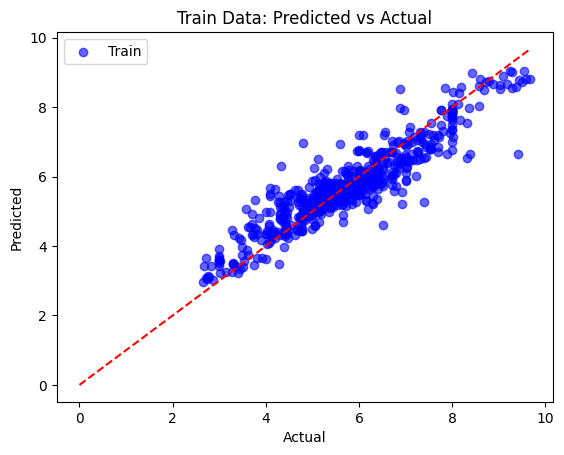

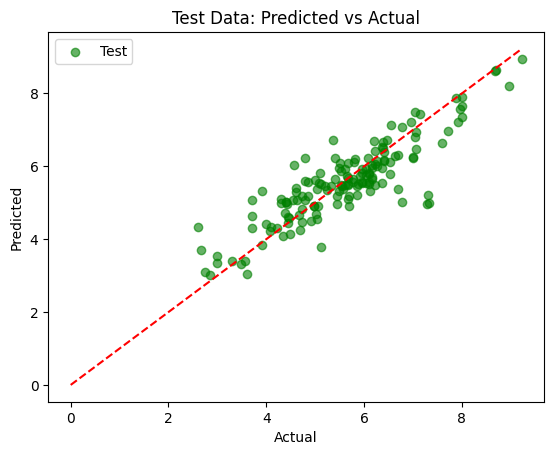

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import math

# Define hyperparameters with stronger regularization
hyper_params_GBR = {
    "n_estimators": np.arange(100, 500, 10),  # Reduce the range of n_estimators
    "max_depth": [4,5],  # Try more restrictive depth
    "learning_rate": [0.01, 0.009],  # Lower learning rate for smoother convergence
    "subsample": [0.4, 0.5],  # Use subsampling to prevent overfitting
    "min_samples_leaf": [ 11, 12]  # Additional regularization
}

# Set random seed for reproducibility
np.random.seed(22)

# Initialize GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV with adjusted settings
g_search_GB = RandomizedSearchCV(GB, hyper_params_GBR, cv=10, n_jobs=-1, n_iter=50, random_state=42)
g_search_GB.fit(X_Train, Y_Train)

# Predictions on train and test data
predict_GB_train = g_search_GB.predict(X_Train)
predict_GB_test = g_search_GB.predict(X_Test)

# Compute RMSE
mse_GB_train = mean_squared_error(Y_Train, predict_GB_train)
mse_GB_test = mean_squared_error(Y_Test, predict_GB_test)
rmse_GB_train = math.sqrt(mse_GB_train)
rmse_GB_test = math.sqrt(mse_GB_test)

# Print RMSE
print(f"Train RMSE: {rmse_GB_train}")
print(f"Test RMSE: {rmse_GB_test}")

# Compute R²
r2_GB_train = r2_score(Y_Train, predict_GB_train)
r2_GB_test = r2_score(Y_Test, predict_GB_test)
print(f"Train R²: {r2_GB_train}")
print(f"Test R²: {r2_GB_test}")

# Best model found
print(f"Best Estimator: {g_search_GB.best_estimator_}")

# Plot predictions vs actual values for training set
plt.scatter(Y_Train, predict_GB_train, color="blue", alpha=0.6, label="Train")
plt.plot([0, max(Y_Train)], [0, max(Y_Train)], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Train Data: Predicted vs Actual")
plt.legend()
plt.show()

plt.scatter(Y_Test, predict_GB_test, color="green", alpha=0.6, label="Test")
plt.plot([0, max(Y_Test)], [0, max(Y_Test)], color="red", linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Data: Predicted vs Actual")
plt.legend()
plt.show()

In [9]:
AA_New_Drug="C:/Users/ganes/OneDrive/Desktop/AI/Drug/DNA/New_Smiles_String.xlsx"
X_New_Drug = pd.read_excel(AA_New_Drug, usecols='A:AMJ') 
GB_New_Drug = g_search_GB.predict(X_New_Drug)
print(GB_New_Drug)
df_GB_New = pd.DataFrame (GB_New_Drug)
df_GB_New.columns=["Predicted"] 
filepath = 'GB_New_Drug.xlsx'
df_GB_New.to_excel(filepath, index=False)

[5.40427203 5.3959545  5.72258815 5.51485152 5.75533977 5.38166083
 5.60319054 6.35284255 6.18374837 6.3630807  5.18710864 7.08837472]
